In [78]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pylab as plt

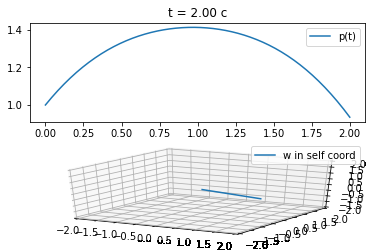

In [89]:
data_t = open("data_t", "r")
data_w = open("data_w", "r")

mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure()
#ax = fig.gca(projection='3d')

t_array = np.fromfile(data_t, dtype=np.double)
w_array = np.fromfile(data_w, dtype=np.double)
p_l = []
q_l = []
r_l = []
t_l = []
i = 0

for t in t_array:
    p = w_array[3*i]
    q = w_array[3*i + 1]
    r = w_array[3*i + 2]
    i = i + 1
    #there we draw 2d plot
    t_l.append(t)
    p_l.append(p)
    q_l.append(q)
    r_l.append(r)
    
    ax = fig.add_subplot(2, 1, 1)
    
    ax.cla()
    ax.plot(t_l, p_l, label = 'p(t)')
    ax.legend()
    plt.title('t = {:.2f} c'.format(t))
    
    #there we draw 3d plot
    
    ax = fig.add_subplot(2, 1, 2, projection='3d')
    
    x_l = np.linspace(0, p, 50)
    y_l = []
    z_l = []

    for x in x_l:
        y_l.append(q*x/p)
        z_l.append(r*x/p)
    
    ax.cla()
    ax.set_xlim3d(-2, 2)
    ax.set_ylim3d(-2, 2)
    ax.set_zlim3d(-2, 2)
    ax.plot(x_l, y_l, z_l, label='w in self coord')
    ax.legend()
    plt.savefig('frames/e{:04.0f}.png'.format(t*100), bbox_inches = 'tight', dpi = 240)
    #plt.savefig('frames/p_{:04.0f}.png'.format(t*100), bbox_inches = 'tight', dpi = 240)